In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [42]:
df =  pd.read_csv("sales_data_sample.csv",encoding='latin')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [43]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [44]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [45]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [46]:
#ADDRESSLINE2, STATE, POSTALCODE, TERRITORY have NaN

null_variables = df.isnull().sum().sort_values(ascending = False)
null_rates = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([null_variables,null_rates],axis = 1,keys=['N of null','Rates'])

In [47]:
missing_data

,N of null,Rates
ADDRESSLINE2,2521,0.893022
STATE,1486,0.526390
TERRITORY,1074,0.380446
POSTALCODE,76,0.026922
ORDERNUMBER,0,0.000000
CUSTOMERNAME,0,0.000000
CONTACTFIRSTNAME,0,0.000000
CONTACTLASTNAME,0,0.000000
COUNTRY,0,0.000000
CITY,0,0.000000


In [48]:
#ADDRESSLINE2, STATE, TERRITORY rates are too much to handle missing values

df = df.drop(["ADDRESSLINE2","STATE","TERRITORY"], axis=1)

#PHONE, ADRESSLINE1, POSTALCODE columns are significant

df= df.drop(["PHONE","ADDRESSLINE1","POSTALCODE"],axis=1)

# drop 'ORDERDATE' because we have YEAR ID, MONTH ID
df= df.drop(["ORDERDATE"],axis=1)

#drop 'STATUS', 'POSTALCODE', 'CITY',
#'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER'
#They are not required for analysis
drops = ['STATUS', 'CITY','CONTACTFIRSTNAME',
         'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
data= df.drop(drops,axis=1)

data.head(6)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
5,36,96.66,1,3479.76,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [49]:
#Encoding categorical features

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.loc[:, 'PRODUCTLINE'] = labelencoder.fit_transform(data.loc[:, 'PRODUCTLINE'])
data['COUNTRY'] = labelencoder.fit_transform(data['COUNTRY'])
data['DEALSIZE'] = labelencoder.fit_transform(data['DEALSIZE'])
data['PRODUCTCODE'] = labelencoder.fit_transform(data['PRODUCTCODE'])

data.head(4)

<ipython-input-49-e0a5f4744a96>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'PRODUCTLINE'] = labelencoder.fit_transform(data.loc[:, 'PRODUCTLINE'])


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,1,95,0,18,2
1,34,81.35,5,2765.90,2,5,2003,1,95,0,6,2
2,41,94.74,2,3884.34,3,7,2003,1,95,0,6,1
3,45,83.26,6,3746.70,3,8,2003,1,95,0,18,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

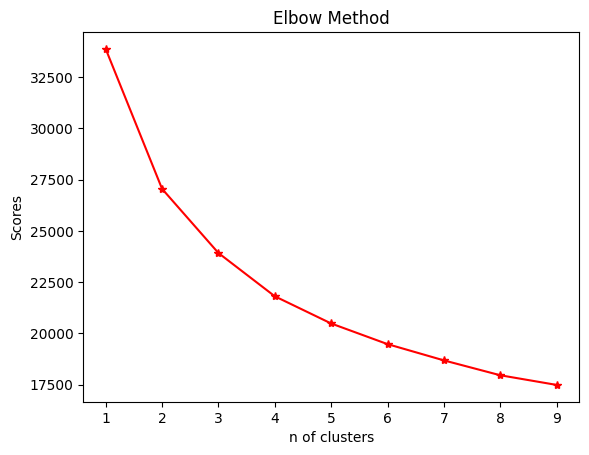

In [50]:
#Finding optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scores_1 = []

range_of_cluster = range(1,10)

for i in range_of_cluster:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'r*-')
plt.xticks(np.arange(len(scores_1)), np.arange(1, len(scores_1) +1) )
plt.title('Elbow Method')
plt.xlabel('n of clusters')
plt.ylabel('Scores')
plt.show()

In [53]:
# I selected number of clusters as 5. (n = 5)

kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(scaled_data)

clusters_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[data.columns])
y_kmeans = kmeans.fit_predict(scaled_data)

data_with_cluster = pd.concat([data, pd.DataFrame({'CLUSTER': kmeans.labels_})], axis=1)
data_with_cluster.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE,CLUSTER
0,30,95.70,2,2871.00,1,2,2003,1,95,0,18,2,2
1,34,81.35,5,2765.90,2,5,2003,1,95,0,6,2,2
2,41,94.74,2,3884.34,3,7,2003,1,95,0,6,1,0
3,45,83.26,6,3746.70,3,8,2003,1,95,0,18,1,0
4,49,100.00,14,5205.27,4,10,2003,1,95,0,18,1,0
5,36,96.66,1,3479.76,4,10,2003,1,95,0,18,1,0
6,29,86.13,9,2497.77,4,11,2003,1,95,0,6,2,3
7,48,100.00,1,5512.32,4,11,2003,1,95,0,11,1,0
8,22,98.57,2,2168.54,4,12,2003,1,95,0,18,2,3
9,41,100.00,14,4708.44,1,1,2004,1,95,0,6,1,1


In [55]:
#Dimension Reduce
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_comp, columns=['pca_1', 'pca_2', 'pca_3'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)

#Showing
import plotly.express as px
fig = px.scatter_3d(pca_df, x='pca_1', y='pca_2', z='pca_3',
                    color='cluster', symbol='cluster', size_max=20, opacity=0.6)
fig.show()